In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.regularizers import L1L2, l1, l2
from tensorflow.keras.initializers import GlorotUniform, GlorotNormal
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import Precision, Accuracy, Recall
import tensorboard_plugin_wit

In [103]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Live Demo

In [104]:
train_df = pd.read_csv("fashion-mnist_train.csv")

In [105]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
train_df.shape

(60000, 785)

In [107]:
test_df = pd.read_csv("fashion-mnist_test.csv")

In [108]:
test_df.shape

(10000, 785)

In [109]:
testing_sample = train_df.sample(10)

(28, 28)


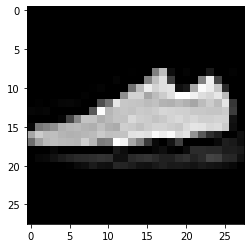

In [110]:
for index, row in testing_sample.iterrows():

    label = row.values[0]
    row_values = row.values[1:].reshape((28,28))
    print(row_values.shape)
    
    plt.imshow(row_values, cmap = "gray")
    plt.show()
    
    break

In [111]:
fashion_attributes = train_df.drop("label", axis = 1)

In [112]:
fashion_attributes.shape

(60000, 784)

In [113]:
fashion_labels = train_df["label"]

In [114]:
type(fashion_attributes), type(fashion_labels)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [115]:
fashion_attributes = train_df.drop("label", axis = 1).values
fashion_labels = train_df["label"].values

In [116]:
type(fashion_attributes), type(fashion_labels)

(numpy.ndarray, numpy.ndarray)

In [117]:
fashion_attributes = fashion_attributes.astype("float64") / 255.0

In [118]:
fashion_attributes.min()

0.0

In [119]:
fashion_attributes.max()

1.0

In [120]:
NUM_COLUMNS = fashion_attributes.shape[1]
NUM_LABELS = len(set(fashion_labels))

In [121]:
nn_model = Sequential([
    Input(NUM_COLUMNS),
    Dense(30, activation="relu"),
    Dense(20, activation="relu"),
    Dense(10, activation="relu"),
    Dense(NUM_LABELS, activation="softmax")
])

In [122]:
nn_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_49 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_50 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                110       
Total params: 24,490
Trainable params: 24,490
Non-trainable params: 0
_________________________________________________________________


In [123]:
tf.one_hot(fashion_labels, 10)

<tf.Tensor: id=1127492, shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)>

In [124]:
nn_model.compile(optimizer = "adam", loss = sparse_categorical_crossentropy)

In [125]:
nn_model.fit(fashion_attributes, fashion_labels, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.6766
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4351
Epoch 3/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3986
Epoch 4/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3788
Epoch 5/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3612
Epoch 6/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3468
Epoch 7/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3364
Epoch 8/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3264
Epoch 9/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3188
Epoch 10/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3099
Epoch 11/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3058
Epoch 1

In [126]:
tf.test.is_gpu_available()

False

In [127]:
nn_model2 = Sequential([
    Input(NUM_COLUMNS),
    Dense(20, activation="relu"),
    Dense(10, activation="relu"),
    Dense(30, activation="relu"),
    Dense(NUM_LABELS, activation="softmax")
])

In [128]:
nn_model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_54 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                310       
Total params: 16,550
Trainable params: 16,550
Non-trainable params: 0
_________________________________________________________________


In [129]:
nn_model2.compile(optimizer = "adam", loss = sparse_categorical_crossentropy)
nn_model2.fit(fashion_attributes, fashion_labels, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.6355
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4323
Epoch 3/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3965
Epoch 4/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3724
Epoch 5/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3597
Epoch 6/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3484
Epoch 7/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3401
Epoch 8/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3319
Epoch 9/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.32290s - loss: 0
Epoch 10/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3179
Epoch 11/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.

In [130]:
nn_model2.layers[1].kernel

<tf.Variable 'dense_53/kernel:0' shape=(20, 10) dtype=float32, numpy=
array([[ 0.24378093, -0.23956919, -0.17608233,  0.24583419,  0.42739204,
         0.37551486,  1.0262855 ,  0.10369918,  0.42574778, -0.37509477],
       [-0.2628033 ,  0.23273626, -0.44769627,  0.08512498, -0.5851472 ,
         0.09792862, -0.36452028,  0.21332319, -0.36950612, -0.11599426],
       [ 0.3467895 , -0.11463416, -0.23322457, -0.130527  , -0.50319546,
        -0.00544308, -0.15487151,  0.36499763,  0.12134468, -0.09606608],
       [-0.02055614,  0.10460368, -0.27784827,  0.33816254,  0.2597848 ,
        -0.35905245, -0.25297573, -0.16528642, -0.300891  , -0.31445372],
       [-0.2971508 ,  0.29998514,  0.10659432,  0.8911146 , -0.3860755 ,
         0.3855793 , -0.383239  , -0.3759941 , -0.3986947 ,  0.6784705 ],
       [-0.20999917,  0.5728418 , -1.0956954 ,  0.1813972 , -0.20840313,
        -0.261868  , -0.09917118, -0.19314486,  0.24756478,  0.3527935 ],
       [ 0.18663155,  0.04968715, -0.22935079,  

In [131]:
nn_model2.layers[1].bias

<tf.Variable 'dense_53/bias:0' shape=(10,) dtype=float32, numpy=
array([ 0.31465992, -0.31024608,  0.34202257,  0.4497845 , -0.1576412 ,
        0.7711385 ,  0.52879256,  0.19847873, -0.04825997,  0.16355376],
      dtype=float32)>

In [132]:
nn_model2.layers[1].weights

[<tf.Variable 'dense_53/kernel:0' shape=(20, 10) dtype=float32, numpy=
 array([[ 0.24378093, -0.23956919, -0.17608233,  0.24583419,  0.42739204,
          0.37551486,  1.0262855 ,  0.10369918,  0.42574778, -0.37509477],
        [-0.2628033 ,  0.23273626, -0.44769627,  0.08512498, -0.5851472 ,
          0.09792862, -0.36452028,  0.21332319, -0.36950612, -0.11599426],
        [ 0.3467895 , -0.11463416, -0.23322457, -0.130527  , -0.50319546,
         -0.00544308, -0.15487151,  0.36499763,  0.12134468, -0.09606608],
        [-0.02055614,  0.10460368, -0.27784827,  0.33816254,  0.2597848 ,
         -0.35905245, -0.25297573, -0.16528642, -0.300891  , -0.31445372],
        [-0.2971508 ,  0.29998514,  0.10659432,  0.8911146 , -0.3860755 ,
          0.3855793 , -0.383239  , -0.3759941 , -0.3986947 ,  0.6784705 ],
        [-0.20999917,  0.5728418 , -1.0956954 ,  0.1813972 , -0.20840313,
         -0.261868  , -0.09917118, -0.19314486,  0.24756478,  0.3527935 ],
        [ 0.18663155,  0.04968715, 

In [133]:
nn_model2.layers[2].bias

<tf.Variable 'dense_54/bias:0' shape=(30,) dtype=float32, numpy=
array([ 0.05215172,  0.6086847 ,  0.61592066,  0.00511712,  0.10586764,
       -0.26219028, -0.18984021, -0.02516861,  0.13728502,  0.19617876,
       -0.4341307 ,  0.6314111 , -0.24439895, -0.20427042,  0.29094648,
        0.4438365 , -0.01954989,  0.9474237 ,  0.15301202,  0.67201936,
        0.32280067,  0.00766216,  0.00954948,  0.5901682 ,  0.6152789 ,
        0.6157283 , -0.21922332, -0.30428907,  0.93352884,  0.90893775],
      dtype=float32)>

In [134]:
nn_model2 = Sequential([
    Input(NUM_COLUMNS),
    Dense(20, activation="relu", kernel_regularizer= L1L2(), bias_regularizer=L1L2()),
    Dense(10, activation="relu"),
    Dense(30, activation="relu"),
    Dense(NUM_LABELS, activation="softmax")
])

In [135]:
regularizer = L1L2(l1=0.01, l2=0.0001)

In [136]:
nn_model2 = Sequential([
    Input(NUM_COLUMNS),
    Dense(20, activation="relu"),
    Dropout(0.05),
    Dense(10, activation="relu"),
    Dropout(0.05),
    Dense(30, activation="relu"),
    Dropout(0.05),
    Dense(NUM_LABELS, activation="softmax", kernel_regularizer=regularizer, bias_regularizer=regularizer)
])

In [137]:
nn_model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 20)                15700     
_________________________________________________________________
dropout_13 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 30)                330       
_________________________________________________________________
dropout_15 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)              

In [138]:
nn_model2.compile(optimizer = "adam", loss = sparse_categorical_crossentropy)

In [139]:
history = nn_model2.fit(fashion_attributes, fashion_labels, epochs = 20, steps_per_epoch = 1000)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 47us/sample - loss: 1.1672
Epoch 2/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.7591
Epoch 3/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6722
Epoch 4/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6215
Epoch 5/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5889
Epoch 6/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5651
Epoch 7/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5479
Epoch 8/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5315
Epoch 9/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5204
Epoch 10/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.5073
Epoch 11/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4980
Epoch 1

In [140]:
history.history

{'loss': [1.167246433198452,
  0.759123457044363,
  0.672164942085743,
  0.6214652698636055,
  0.5889148466587066,
  0.565122552961111,
  0.5479137389957904,
  0.5314606703817845,
  0.5203826313018799,
  0.5072994697391987,
  0.49796925982832907,
  0.4907218111604452,
  0.48301316490769386,
  0.47515853157639504,
  0.4714569976478815,
  0.467928523376584,
  0.4625255979150534,
  0.46147058449685574,
  0.459452719733119,
  0.4501467439085245]}

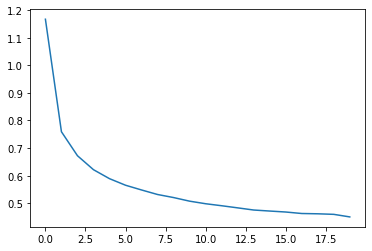

In [141]:
plt.plot(history.history["loss"])
plt.show()

In [142]:
nn_model3 = Sequential([
    Input(NUM_COLUMNS),
    BatchNormalization(),
    Dense(20, activation="relu"),
    BatchNormalization(),
    Dense(10, activation="relu"),
    BatchNormalization(),
    Dense(30, activation="relu"),
    Dense(NUM_LABELS, activation="softmax", kernel_regularizer=regularizer, bias_regularizer=regularizer)
])

In [143]:
nn_model3.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_64 (Dense)             (None, 20)                15700     
_________________________________________________________________
batch_normalization_4 (Batch (None, 20)                80        
_________________________________________________________________
dense_65 (Dense)             (None, 10)                210       
_________________________________________________________________
batch_normalization_5 (Batch (None, 10)                40        
_________________________________________________________________
dense_66 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_67 (Dense)             (None, 10)              

In [144]:
nn_model3.compile(optimizer = "adam", loss = sparse_categorical_crossentropy)

In [145]:
history = nn_model3.fit(fashion_attributes, fashion_labels, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 122us/sample - loss: 0.9252
Epoch 2/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.5791
Epoch 3/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.5192
Epoch 4/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4841
Epoch 5/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4607
Epoch 6/20
60000/60000 [==============================] - 8s 135us/sample - loss: 0.4445
Epoch 7/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4349
Epoch 8/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4211
Epoch 9/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4140
Epoch 10/20
60000/60000 [==============================] - 5s 92us/sample - loss: 0.4070
Epoch 11/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3987
Ep